# JHMDB
http://jhmdb.is.tue.mpg.de/dataset

Download the dataset and extract it so that your folder structure is as follows:

* /path/to/your/JHMDB
    * /images
        * /brush_hair
        * /catch
        * /...
    * /person_poses


In [1]:
%matplotlib inline
import json; from pprint import pprint
Settings = json.load(open('settings.txt'))
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0,'../')

from pak.datasets.JHMDB import JHMDB

jhmdb_root = Settings['jhmdb_root']
fmmap = Settings['jhmdb_memmap']  # file with *.npy 

jhmdb = JHMDB(jhmdb_root, fmmap, verbose=False)



[JHMDB] is memory-mapped: True
-------------------
[JHMDB]	handle  brush_hair
-------------------
-------------------
[JHMDB]	handle  catch
-------------------
-------------------
[JHMDB]	handle  clap
-------------------
-------------------
[JHMDB]	handle  climb_stairs
-------------------
-------------------
[JHMDB]	handle  golf
-------------------
-------------------
[JHMDB]	handle  jump
-------------------
-------------------
[JHMDB]	handle  kick_ball
-------------------
-------------------
[JHMDB]	handle  pick
-------------------
-------------------
[JHMDB]	handle  pour
-------------------
-------------------
[JHMDB]	handle  pullup
-------------------
-------------------
[JHMDB]	handle  push
-------------------
-------------------
[JHMDB]	handle  run
-------------------
-------------------
[JHMDB]	handle  shoot_ball
-------------------
-------------------
[JHMDB]	handle  shoot_bow
-------------------
-------------------
[JHMDB]	handle  shoot_gun
-------------------
-----------------

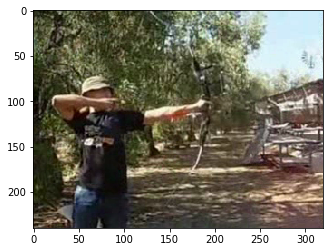

In [2]:
X = jhmdb.X[21020]


plt.imshow(X)